In [29]:
from sklearn.svm import SVC
import numpy as np
from sklearn import datasets
import pandas as pd
from ensemble import EnsembleClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from functions import metrics, get_labeled_scores


In [18]:
from importlib import reload

In [22]:
import functions
reload(functions)

<module 'functions' from 'c:\\Users\\Dell\\Documents\\Studia\\semestr 2\\Zaawansowane uczenie maszynowe\\projekt\\functions.py'>

In [2]:
# datasety
iris = datasets.load_iris()
cancer = datasets.load_breast_cancer()
wines = datasets.load_wine()
diabetes = pd.read_csv('diabetes.csv')

In [3]:
# algorytmy
algos = [KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression, GaussianNB, SVC]

In [4]:
iris = datasets.load_iris()
X = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:

test = EnsembleClassifier(SVC(probability=True)).fit(X_train, y_train)

In [12]:
test_proba = test.predict_proba(X_test)

In [6]:
max_features = math.floor(math.sqrt(len(X.columns)))
bag = BaggingClassifier(SVC(probability=True), max_features=max_features).fit(X_train, y_train)

In [13]:
bag_proba = bag.predict_proba(X_test)

In [24]:
get_labeled_scores(np.abs(test_proba-bag_proba), 4)

{'Średnia': 0.0261,
 'Odchylenie standardowe': 0.0269,
 'Wartość minimalna': 0.0002,
 'Wartość maksymalna': 0.1229}

Accuracy: 1.0
 Macro precision: 1.0
 Macro recall: 1.0 
 Macro f1-score: 1.0


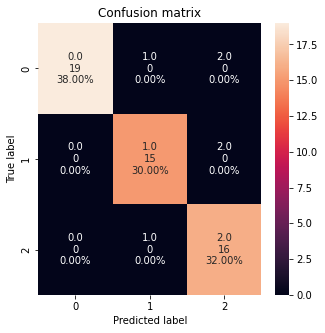

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}

In [7]:
y_test_pred = test.predict(X_test)
metrics(y_test, y_test_pred)

In [8]:
y_test_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [9]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

Accuracy: 0.98
 Macro precision: 0.9791666666666666
 Macro recall: 0.9791666666666666 
 Macro f1-score: 0.978494623655914


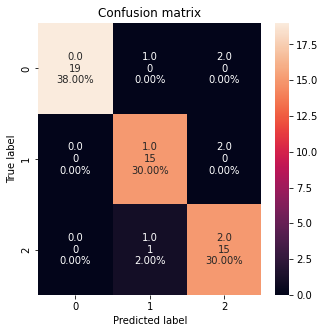

{'accuracy': 0.98,
 'precision': 0.9791666666666666,
 'recall': 0.9791666666666666,
 'f1-score': 0.978494623655914}

In [26]:
bag_pred = bag.predict(X_test)
metrics(y_test, bag_pred)

In [27]:
forest = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

Accuracy: 0.98
 Macro precision: 0.9791666666666666
 Macro recall: 0.9791666666666666 
 Macro f1-score: 0.978494623655914


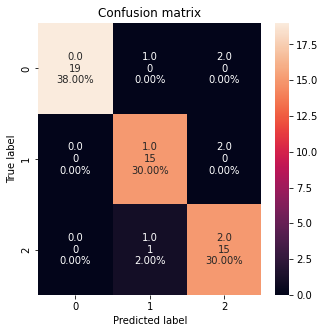

{'accuracy': 0.98,
 'precision': 0.9791666666666666,
 'recall': 0.9791666666666666,
 'f1-score': 0.978494623655914}

In [28]:
forest_pred = forest.predict(X_test)
metrics(y_test, forest_pred)